In [1]:
import pandas as pd
%matplotlib notebook
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

filename = "data/listings.csv"
listings_df = pd.read_csv(filename)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345


In [2]:
#Creating column for occupancy percentage
listings_df['occupancy'] = (365-listings_df['availability_365'])/365
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,occupancy
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64,0.824658
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347,0.049315
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210,0.424658
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347,0.049315
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345,0.054795


In [3]:
occup_byroomtype = listings_df.groupby('room_type').mean()['occupancy']
occup_byroomtype = pd.DataFrame(occup_byroomtype)
occup_byroomtype.head()

,occupancy
room_type,
Entire home/apt,0.448780
Hotel room,0.384571
Private room,0.577349
Shared room,0.392777


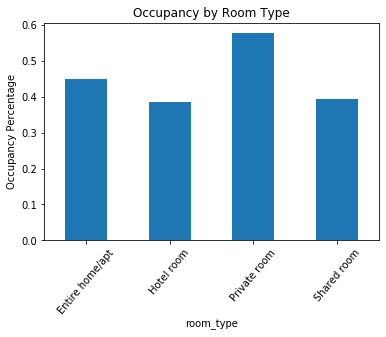

In [4]:
# Occupancy by Room Type
also = occup_byroomtype.plot.bar(legend=False,rot=50)
also
plt.ylabel("Occupancy Percentage")
plt.title("Occupancy by Room Type")
plt.savefig('Occupancy by Room Type')

In [5]:
filename_reviews = "data/reviews_full.csv"
reviews_df = pd.read_csv(filename_reviews)
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,38585,129120,2010-10-28,55877,Ritchie,Evelyne is an accommodating host who lives in ...
1,38585,147273,2010-11-30,279973,Cathy,Evelyne was very welcoming to her home; my fri...
2,38585,198797,2011-03-14,411638,NaN,I really enjoyed Evelyne's welcoming and bubbl...
3,38585,201932,2011-03-17,441855,Bill,Very gracious host and was helpful in all aspe...
4,38585,341616,2011-06-28,657560,Joakim,Evelyn was very friendly and easy to comunicat...


In [6]:
filename_calendar = "data/calendar.csv"
calendar_df = pd.read_csv(filename_calendar)
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2283071,2019-11-28,f,$38.00,$38.00,1,1125
1,2283071,2019-11-29,f,$38.00,$38.00,1,1125
2,2283071,2019-11-30,f,$38.00,$38.00,1,1125
3,2283071,2019-12-01,f,$38.00,$38.00,1,1125
4,2283071,2019-12-02,f,$38.00,$38.00,1,1125


In [7]:
calendar_df['price'] = calendar_df['price'].replace('[\$,]', '', regex=True).astype(float)
calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2283071,2019-11-28,f,38.0,$38.00,1,1125
1,2283071,2019-11-29,f,38.0,$38.00,1,1125
2,2283071,2019-11-30,f,38.0,$38.00,1,1125
3,2283071,2019-12-01,f,38.0,$38.00,1,1125
4,2283071,2019-12-02,f,38.0,$38.00,1,1125


In [10]:
price_bydate = calendar_df.groupby('date').mean()['price']
price_bydate = pd.DataFrame(price_bydate)
price_bydate.head()

,price
date,
2019-11-28,158.063908
2019-11-29,172.692339
2019-11-30,166.969685
2019-12-01,142.653830
2019-12-02,136.508808


In [11]:
price_bydate.reset_index()

,date,price
0,2019-11-28,158.063908
1,2019-11-29,172.692339
2,2019-11-30,166.969685
3,2019-12-01,142.653830
4,2019-12-02,136.508808
5,2019-12-03,135.594019
6,2019-12-04,135.645637
7,2019-12-05,138.239246
8,2019-12-06,159.776731
9,2019-12-07,161.555510


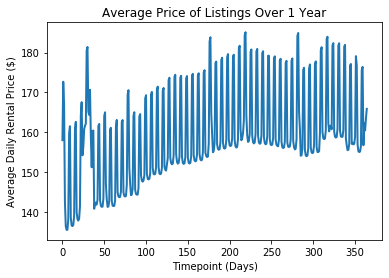

In [12]:
x_axis = range(365)
y_axis = price_bydate["price"]

plt.title('Average Price of Listings Over 1 Year')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Average Daily Rental Price ($)')

plt.savefig('Average Price of Listings Over 1 Year')
plt.show()

In [13]:
#finding number of unique listings
calendar_df['listing_id'].nunique()

2441

In [14]:
#Isolate booked listings
available_false = calendar_df.loc[calendar_df["available"]=="f",:]
#Group by date counting number of booked properties for that date
booked_dates = available_false.groupby('date').count()['available']
booked_dates = pd.DataFrame(booked_dates)
booked_dates.rename(columns = {'available':'booked'}, inplace = True) 
booked_dates

,booked
date,
2019-11-28,2253
2019-11-29,2302
2019-11-30,2009
2019-12-01,1188
2019-12-02,995
2019-12-03,924
2019-12-04,957
2019-12-05,1135
2019-12-06,1645


In [15]:
booked_dates['occupancy']=booked_dates['booked']/2441
booked_dates.head()

,booked,occupancy
date,,
2019-11-28,2253,0.922982
2019-11-29,2302,0.943056
2019-11-30,2009,0.823023
2019-12-01,1188,0.486686
2019-12-02,995,0.407620


In [16]:
booked_dates.reset_index()

,date,booked,occupancy
0,2019-11-28,2253,0.922982
1,2019-11-29,2302,0.943056
2,2019-11-30,2009,0.823023
3,2019-12-01,1188,0.486686
4,2019-12-02,995,0.407620
5,2019-12-03,924,0.378533
6,2019-12-04,957,0.392052
7,2019-12-05,1135,0.464973
8,2019-12-06,1645,0.673904
9,2019-12-07,1716,0.702991


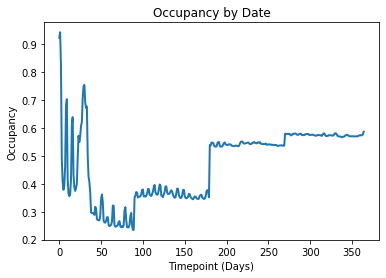

In [17]:
x_axis = range(365)
y_axis = booked_dates["occupancy"]

plt.title('Occupancy by Date')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Occupancy')

plt.savefig('Occupancy by Date')
plt.show()

In [18]:
#Counting number of reviews per listing
reviews_ct = reviews_df.groupby('listing_id').count()['id']
reviews_ct = pd.DataFrame(reviews_ct)
reviews_ct.rename(columns = {'id':'reviews_count'}, inplace = True) 
reviews_ct.head()

,reviews_count
listing_id,
38585,137
80905,102
108061,88
155305,227
156805,64


In [19]:
price_bylist = calendar_df.groupby('listing_id').mean()['price']
price_bylist = pd.DataFrame(price_bylist)
price_bylist.head()

,price
listing_id,
38585,55.123288
80905,606.391781
108061,75.000000
155305,80.104110
156805,60.024658


In [20]:
merged_df = pd.merge(price_bylist, reviews_ct, on="listing_id",how="left")
merged_df.head()

,price,reviews_count
listing_id,,
38585,55.123288,137.0
80905,606.391781,102.0
108061,75.000000,88.0
155305,80.104110,227.0
156805,60.024658,64.0


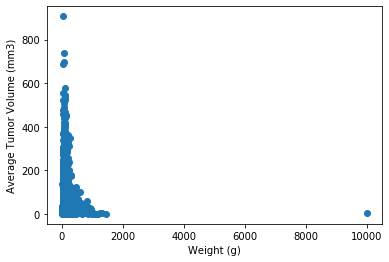

In [21]:
x_axis = merged_df["price"]
y_axis = merged_df["reviews_count"]

plt.scatter(x_axis,y_axis)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('Scatter Plot for Average Price vs Reviews Count')
plt.show()

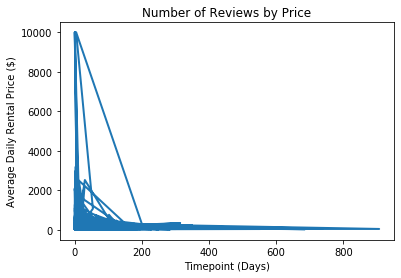

In [22]:
x_axis = listings_df["number_of_reviews"]
y_axis = listings_df["price"]

plt.title('Number of Reviews by Price')
plt.plot(x_axis, y_axis,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Average Daily Rental Price ($)')

plt.savefig('Number of Reviews by Price')
plt.show()

In [23]:
#Adding price buckets
bins = [0, 250, 500, 750, 1000, 10000]

# Create the names for the four bins
group_names = ["250 and under", "251-500", "501-750", "751-1000", "Over 1000"]

listings_df["price_bin"] = pd.cut(listings_df["price"], bins, labels=group_names)
listings_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,occupancy,price_bin
0,38585,Charming Victorian home - twin beds + breakfast,165529,Evelyne,NaN,28804,35.65146,-82.62792,Private room,55,2,137,2019-11-11,1.24,1,64,0.824658,250 and under
1,80905,French Chic Loft,427027,Celeste,NaN,28801,35.59740,-82.55498,Entire home/apt,765,1,102,2019-11-10,1.02,10,347,0.049315,751-1000
2,108061,"Walk downtown or UNCA, Pets OK!",320564,Lisa,NaN,28801,35.60670,-82.55563,Entire home/apt,75,30,88,2019-10-09,0.88,2,210,0.424658,250 and under
3,155305,Cottage! BonPaul + Sharky's Hostel,746673,BonPaul,NaN,28806,35.57972,-82.59617,Entire home/apt,107,1,227,2019-11-18,2.24,7,347,0.049315,250 and under
4,156805,"Private Room ""Ader"" at BPS Hostel",746673,BonPaul,NaN,28806,35.57755,-82.59697,Private room,71,1,64,2019-11-02,0.64,7,345,0.054795,250 and under


In [24]:
# Occupancy by Price Bin
occup_bypricebin = listings_df.groupby('price_bin').mean()['occupancy']
occup_bypricebin = pd.DataFrame(occup_bypricebin)
occup_bypricebin.head()

,occupancy
price_bin,
250 and under,0.505988
251-500,0.323169
501-750,0.149896
751-1000,0.274315
Over 1000,0.281834


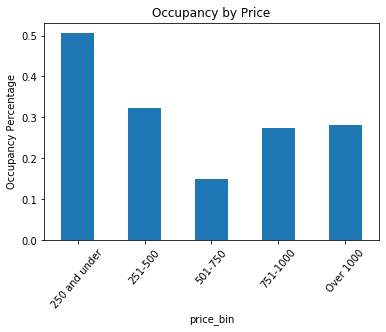

In [26]:
# Occupancy by Price Bin
also2 = occup_bypricebin.plot.bar(legend=False,rot=50)
also2
plt.ylabel("Occupancy Percentage")
plt.title("Occupancy by Price")
plt.savefig('Occupancy by Price Range')

In [29]:
# Occupancy by Average Number of Reviews
occup_byrevct = listings_df.groupby('price_bin').mean()['number_of_reviews']
occup_byrevct = pd.DataFrame(occup_byrevct)
occup_byrevct.head()

,number_of_reviews
price_bin,
250 and under,76.165971
251-500,27.378378
501-750,19.728814
751-1000,18.250000
Over 1000,6.869565


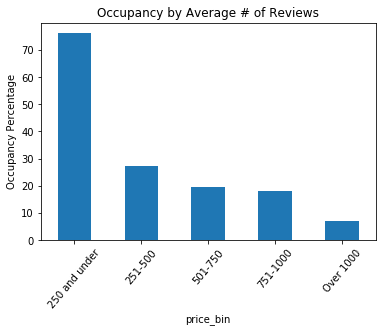

In [30]:
# Occupancy by Average Number of Reviews
also3 = occup_byrevct.plot.bar(legend=False,rot=50)
also3
plt.ylabel("Occupancy Percentage")
plt.title("Occupancy by Average # of Reviews")
plt.savefig('Occupancy by Price Range')